In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-data-analytics/HR DATA MODIFIED.csv
/kaggle/input/hr-data-analytics/HR RAW DATA.csv


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import warnings

In [3]:
df=pd.read_csv('/kaggle/input/hr-data-analytics/HR DATA MODIFIED.csv')
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,1,0,13,3,3,80,0,23,5,3,20,18,15,15
1,52,0,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,1,0,14,3,1,80,1,34,5,3,33,18,11,9
2,42,0,Travel_Rarely,532,Research & Development,4,2,Technical Degree,1,319,3,Male,58,3,5,Manager,4,Married,19232,4933,1,1,0,11,3,4,80,0,22,3,3,22,17,11,15
3,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,1,0,19,3,2,80,2,26,2,4,20,17,5,6
4,46,0,Travel_Rarely,1319,Sales,3,3,Technical Degree,1,1863,1,Female,45,4,4,Sales Executive,1,Divorced,13225,7739,2,1,0,12,3,4,80,1,25,5,3,19,17,2,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,1.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,1.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [7]:
corr=df.corr(numeric_only=True).abs()
corr.style.background_gradient(cmap='coolwarm')

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.010661,0.001686,0.208034,0.010145,0.010146,0.024287,0.029820,0.509604,0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,0.019621,0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.056652,0.077924,0.031373,0.010577,0.103369,0.006846,0.130016,0.169105,0.103481,0.159840,0.015170,0.043494,0.246118,0.013478,0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
DailyRate,0.010661,0.056652,1.000000,0.004985,0.016806,0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,0.037848,0.034055,0.009932,0.033229,0.026363
DistanceFromHome,0.001686,0.077924,0.004985,1.000000,0.021042,0.032916,0.016075,0.031131,0.008783,0.005303,0.003669,0.017014,0.027473,0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,0.036942,0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,0.016806,0.021042,1.000000,0.042070,0.027128,0.016775,0.042438,0.101589,0.011296,0.094961,0.026084,0.126317,0.020322,0.011111,0.024539,0.009118,0.018422,0.148280,0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,0.010145,0.010577,0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,0.006888,0.018519,0.046247,0.014829,0.012648,0.001251,0.024037,0.012944,0.020359,0.069861,0.062227,0.014365,0.023603,0.010309,0.011240,0.008416,0.009019,0.009197
EnvironmentSatisfaction,0.010146,0.103369,0.018355,0.016075,0.027128,0.017621,1.000000,0.049857,0.008278,0.001212,0.006784,0.006259,0.037600,0.012594,0.070132,0.031701,0.029548,0.007665,0.003432,0.002693,0.019359,0.027627,0.001458,0.018007,0.016194,0.004999
HourlyRate,0.024287,0.006846,0.023381,0.031131,0.016775,0.035179,0.049857,1.000000,0.042861,0.027853,0.071335,0.015794,0.015297,0.022157,0.007782,0.009062,0.002172,0.001330,0.050263,0.002334,0.008548,0.004607,0.019582,0.024106,0.026716,0.020123
JobInvolvement,0.029820,0.130016,0.046135,0.008783,0.042438,0.006888,0.008278,0.042861,1.000000,0.012630,0.021476,0.015271,0.016322,0.015012,0.003507,0.017205,0.029071,0.034297,0.021523,0.005533,0.015338,0.014617,0.021355,0.008717,0.024184,0.025976
JobLevel,0.509604,0.169105,0.002966,0.005303,0.101589,0.018519,0.001212,0.027853,0.012630,1.000000,0.001944,0.950300,0.039563,0.142501,0.000544,0.034730,0.021222,0.021642,0.013984,0.782208,0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_28/230887776.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


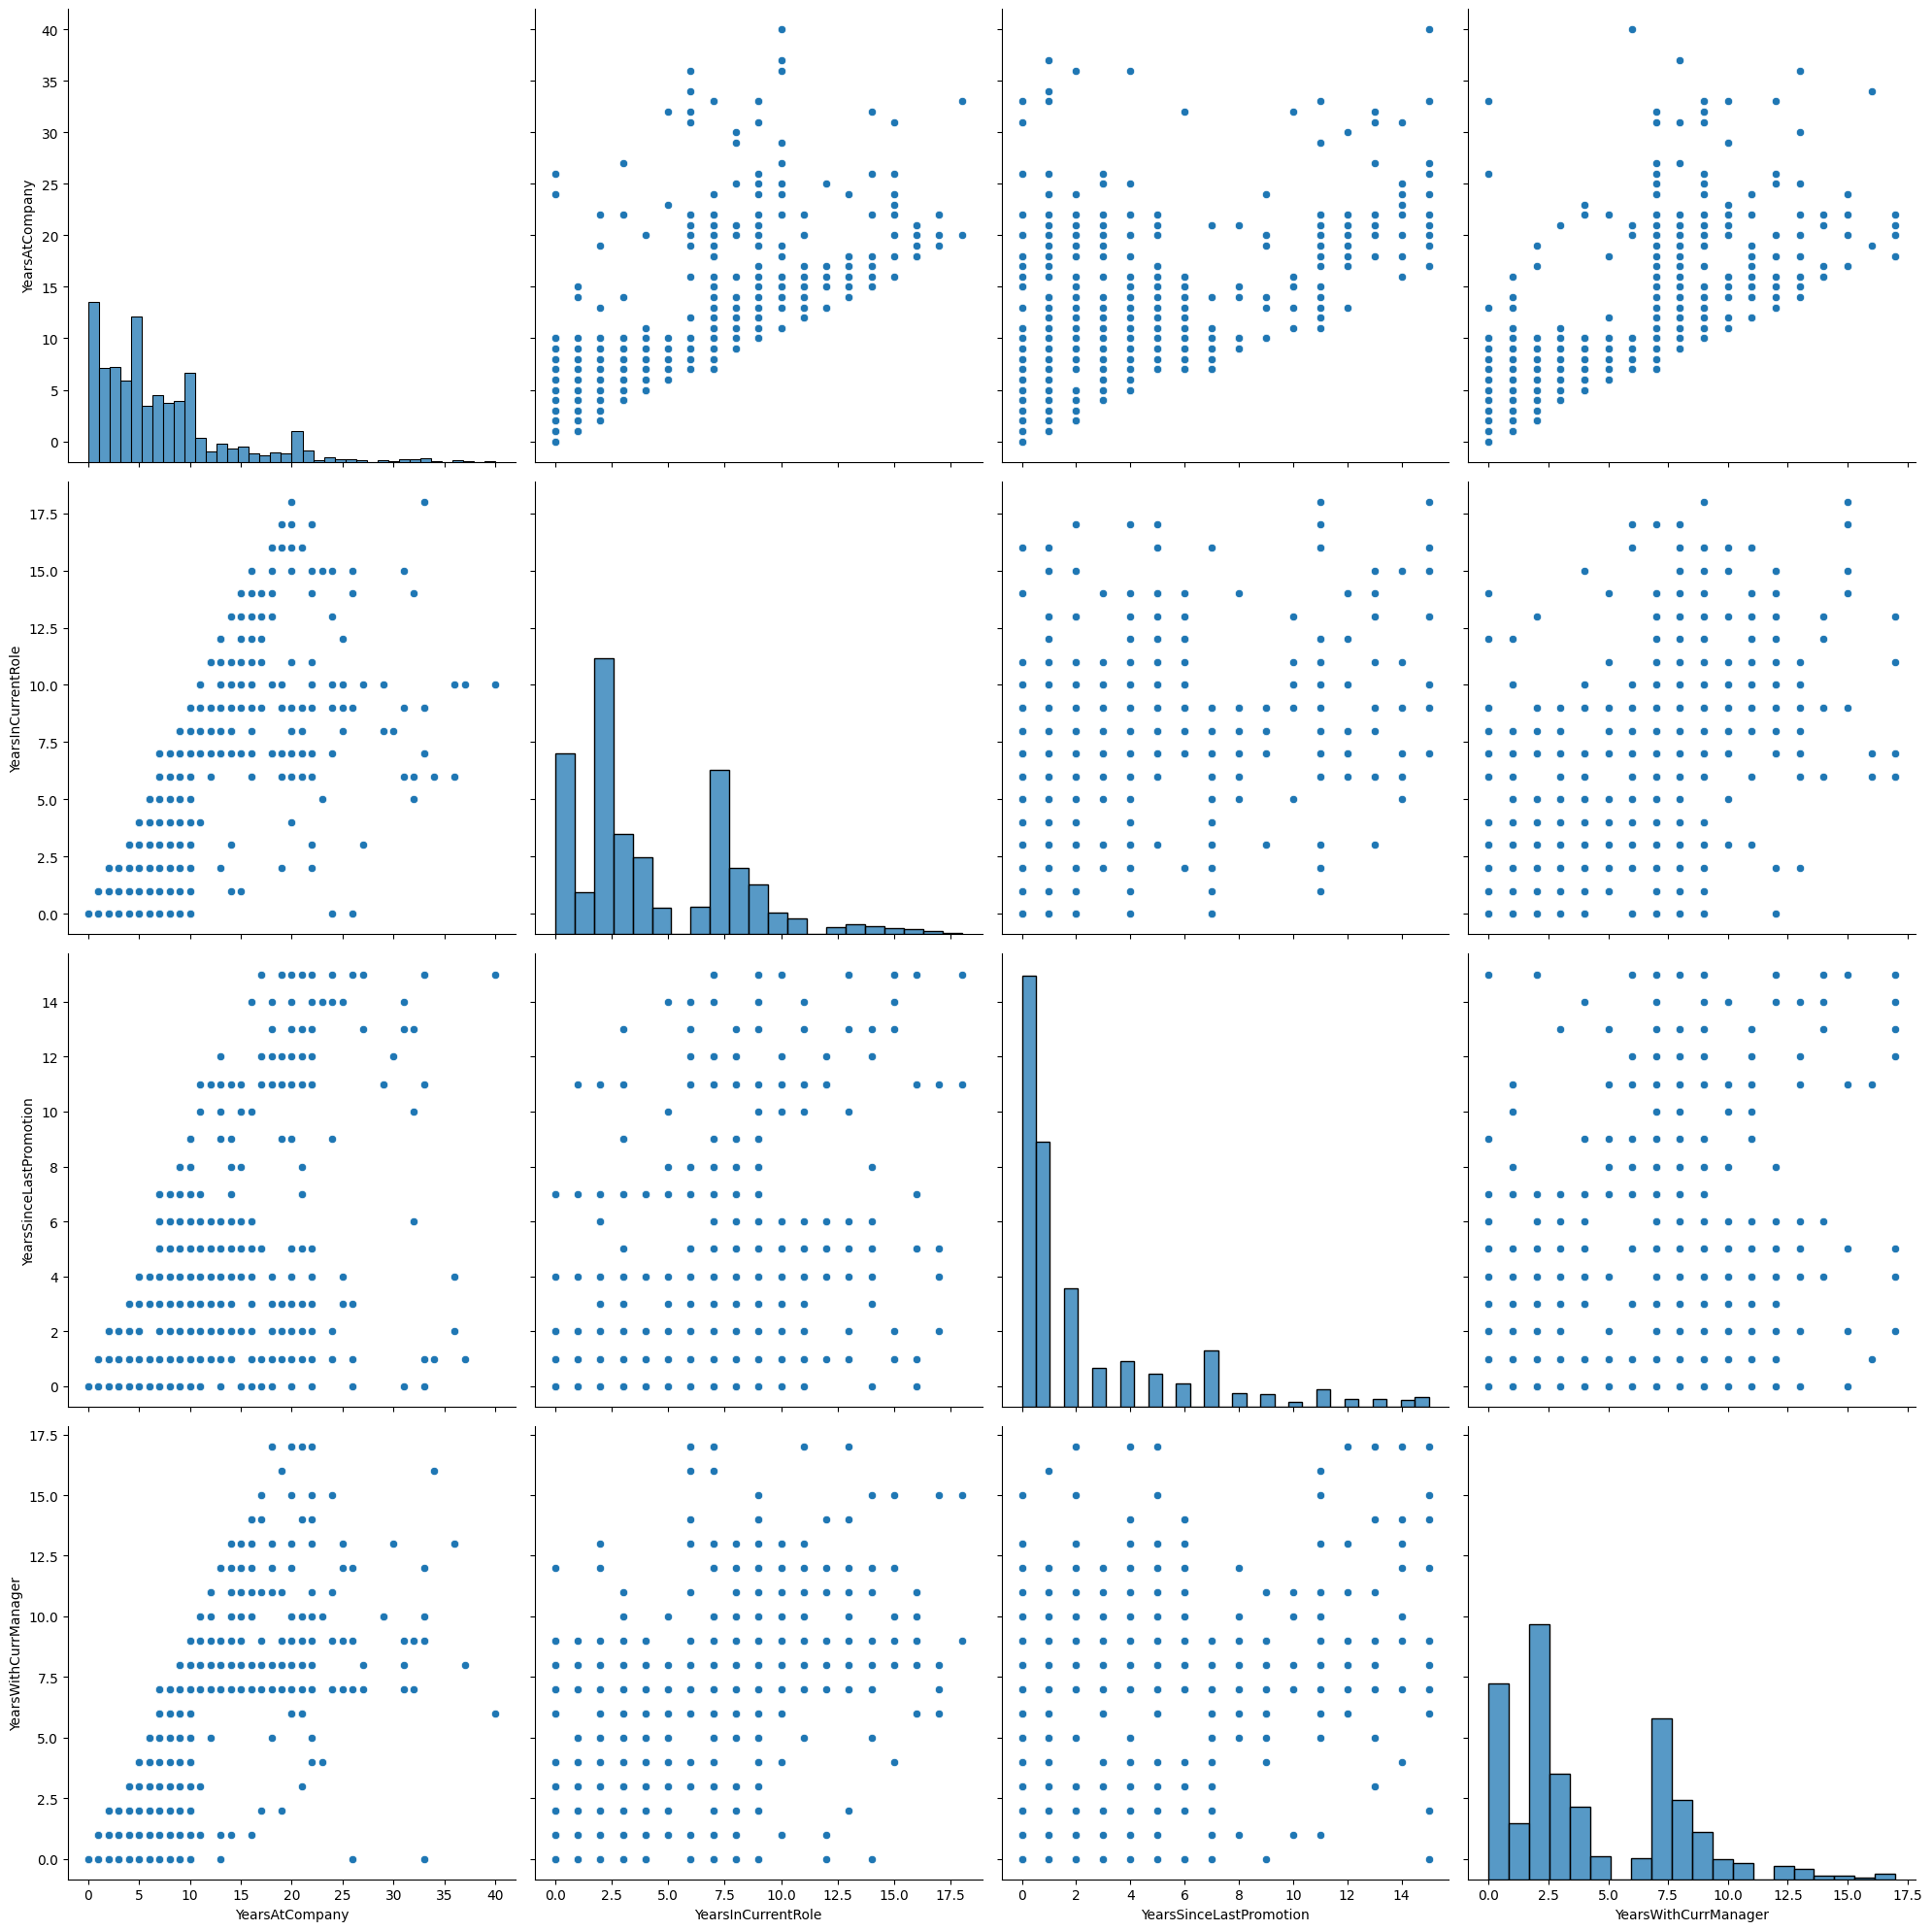

In [71]:
cols=['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
sns.pairplot(df[cols],height=5)
plt.tight_layout()
plt.show()

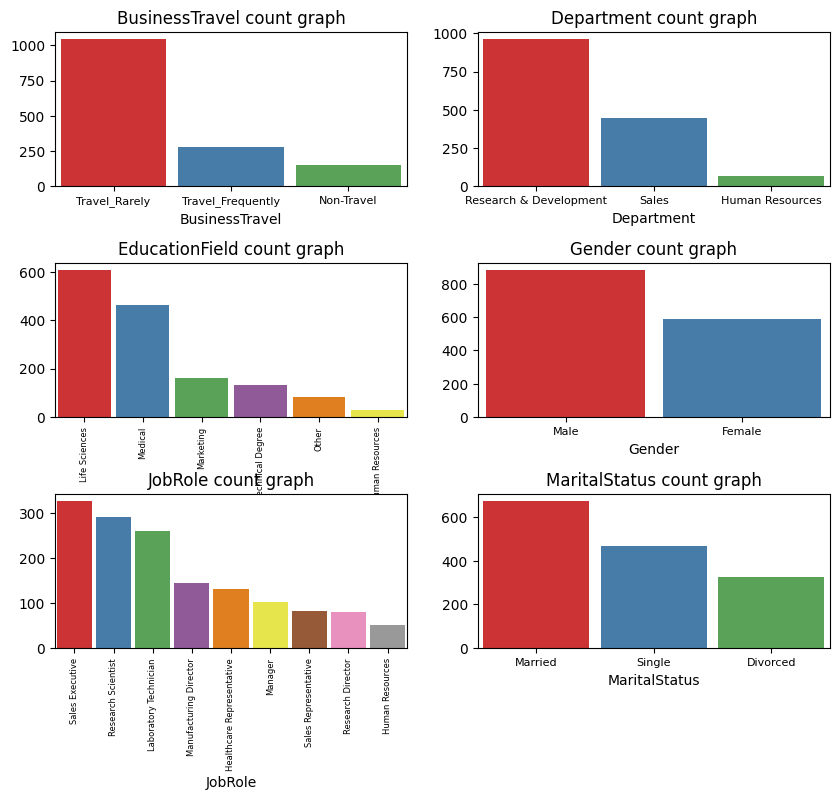

In [12]:
categorical_cols=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']
fig,ax=plt.subplots(3,2,figsize=(10,8))
fig.subplots_adjust(hspace=0.5)
def count_plotter(ax,col,data=df):
    counted=df[col].value_counts()
    sns.barplot(ax=ax,x=counted.index,y=counted.values,width=0.9,palette='Set1' )
    ax.set_title(f"{col} count graph")    
    if col=='JobRole' or col=='EducationField':
       ax.set_xticklabels(labels=counted.index,rotation=90,fontsize=6)
    else:        ax.set_xticklabels(labels=counted.index,fontsize=8)
axes=[ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for category in categorical_cols:
    count_plotter(axes[categorical_cols.index(category)],category)

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,684,Research & Development,6,3,Life Sciences,162,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,0,13,3,3,0,23,5,3,20,18,15,15
1,52,0,Travel_Rarely,699,Research & Development,1,4,Life Sciences,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,0,14,3,1,1,34,5,3,33,18,11,9
2,42,0,Travel_Rarely,532,Research & Development,4,2,Technical Degree,319,3,Male,58,3,5,Manager,4,Married,19232,4933,1,0,11,3,4,0,22,3,3,22,17,11,15
3,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,0,19,3,2,2,26,2,4,20,17,5,6
4,46,0,Travel_Rarely,1319,Sales,3,3,Technical Degree,1863,1,Female,45,4,4,Sales Executive,1,Divorced,13225,7739,2,0,12,3,4,1,25,5,3,19,17,2,8


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_28/2117102468.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_28/2117102468.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_28/2117102468.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


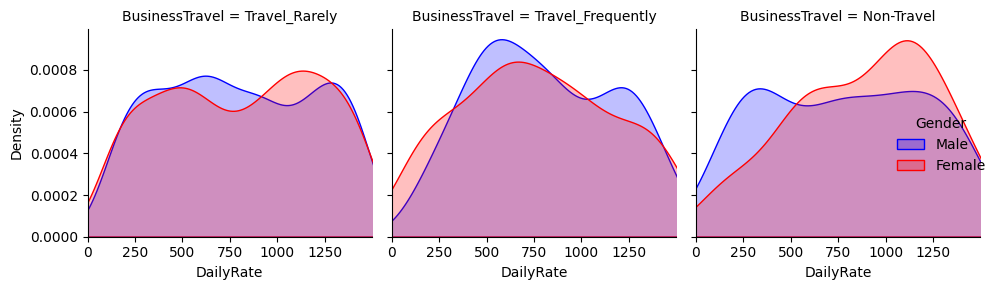

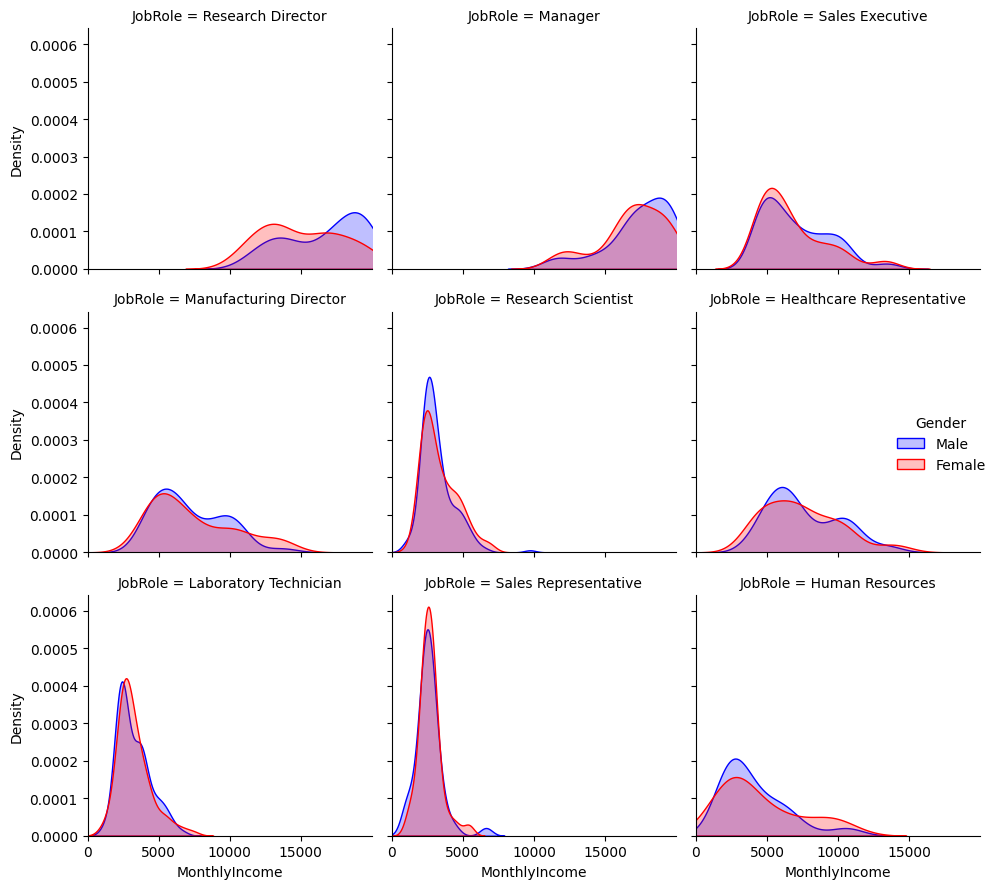

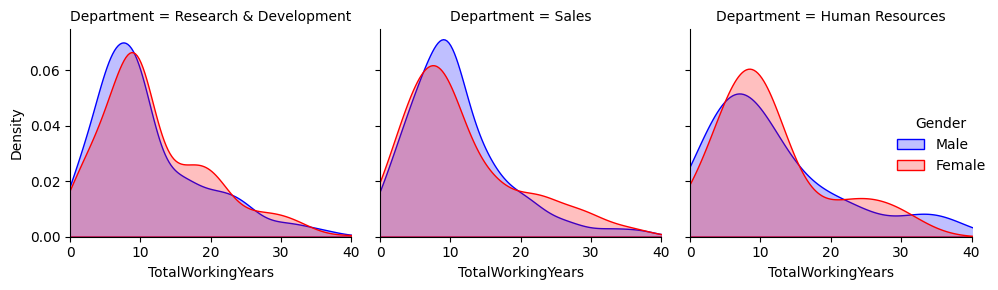

In [85]:
def make_FacetGrid(df,col_name,x_value,hue='Gender'):
    facet=sns.FacetGrid(data=df,col=col_name,hue=hue,aspect=1,palette=['b','r'],col_wrap=3)
    facet.map(sns.kdeplot,x_value,fill=True)
    facet.set(xlim=[0,df[x_value].max()])
    facet.add_legend(label_order=df[hue].unique())
    plt.tight_layout()
col_names=['BusinessTravel','JobRole','Department']
x_values=['DailyRate','MonthlyIncome','TotalWorkingYears']

for i in range(len(col_names)):
    make_FacetGrid(df,col_names[i],x_values[i])
plt.show()

In [16]:
df_heatmap1=df.groupby(['JobRole','JobSatisfaction']).MonthlyIncome.mean().unstack(level=1)
df_heatmap2=df.groupby(['JobInvolvement','JobLevel']).MonthlyRate.mean().unstack(level=1)
df_heatmap2

JobLevel,1,2,3,4,5
JobInvolvement,,,,,
1,12661.666667,15916.314286,14240.900000,21197.000000,14848.000000
2,13853.708029,15410.187500,14519.954545,13940.370370,15923.117647
3,13488.798742,14447.791798,14817.562500,14592.854839,13255.860465
4,14905.051724,14445.703704,13781.285714,14024.857143,18149.250000


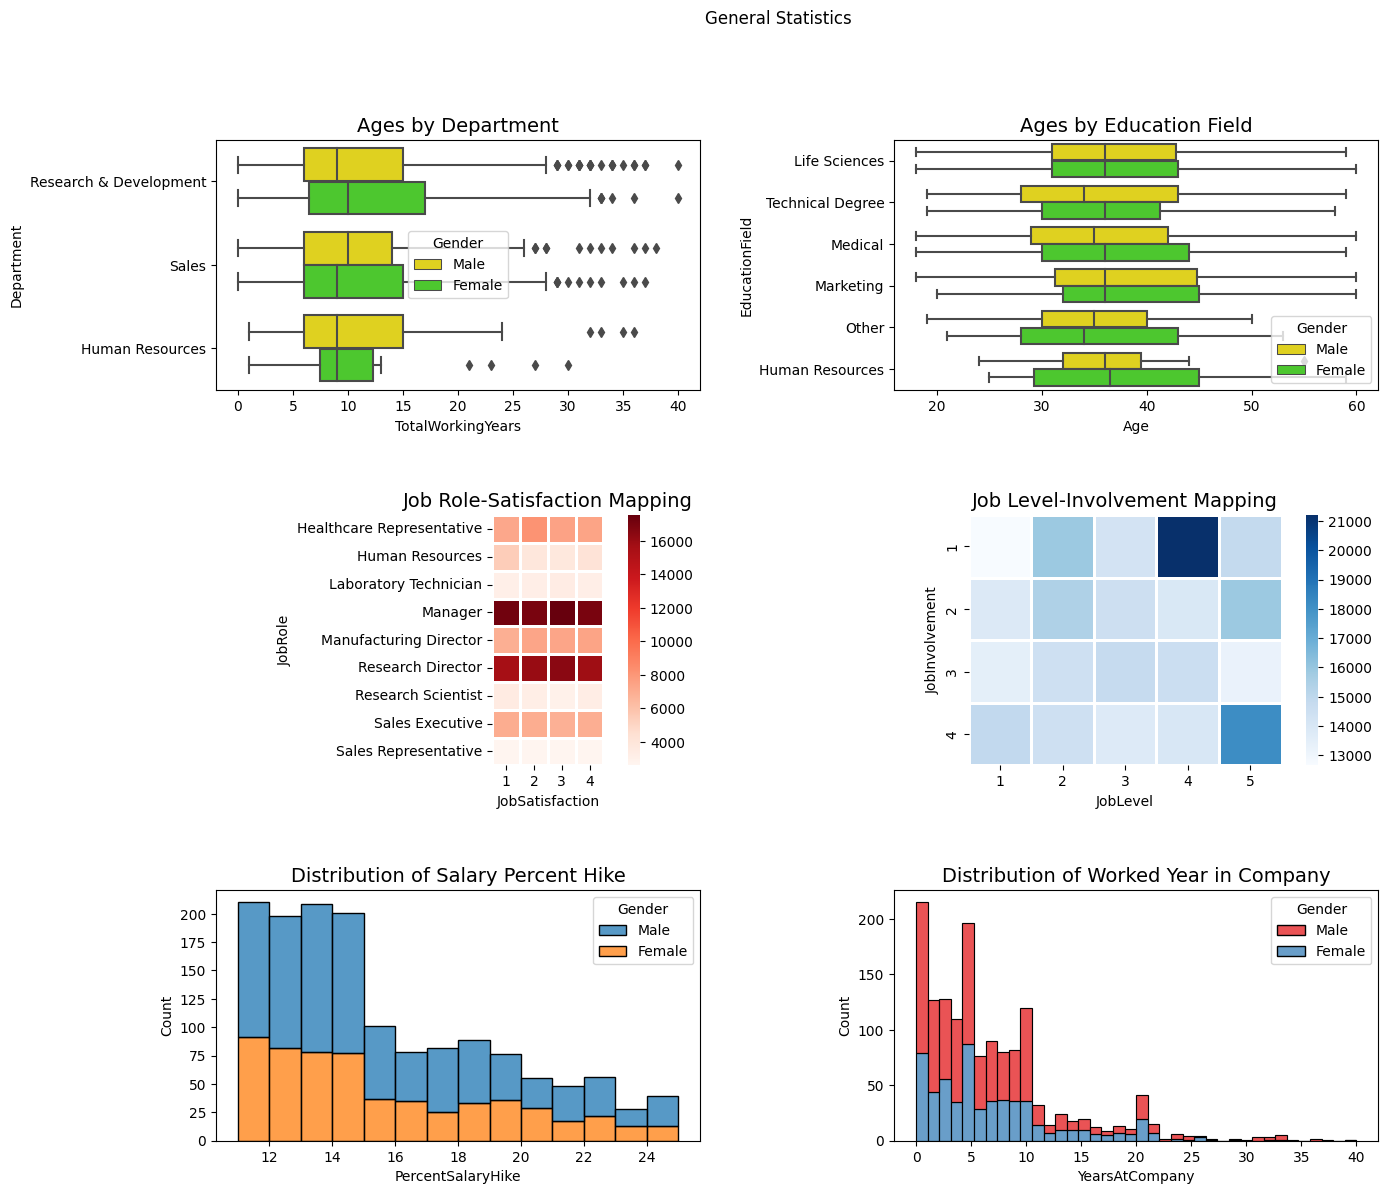

In [73]:
#plt.figure(figsize=(8,4))
fig,ax=plt.subplots(3,2,figsize=(15,13))
fig.suptitle('General Statistics')
fig.subplots_adjust(wspace=0.4,hspace=0.5)
sns.boxplot(ax=ax[0,0],data=df,y='Department',x='TotalWorkingYears',hue='Gender',palette=['#ffec00','#3ee016'])
ax[0,0].set_title('Ages by Department',fontsize=14)
sns.boxplot(ax=ax[0,1],data=df,y='EducationField',x='Age',hue='Gender',palette=['#ffec00','#3ee016'])
ax[0,1].set_title('Ages by Education Field',fontsize=14)
sns.heatmap(ax=ax[1,0],data=df_heatmap1,square=True,linewidth=1,cmap='Reds')
ax[1,0].set_title('Job Role-Satisfaction Mapping',fontsize=14)
sns.heatmap(ax=ax[1,1],data=df_heatmap2,square=True,linewidth=1,cmap='Blues')
ax[1,1].set_title('Job Level-Involvement Mapping',fontsize=14)
sns.histplot(ax=ax[2,0],data=df,x='PercentSalaryHike',hue='Gender',multiple='stack')
ax[2,0].set_title('Distribution of Salary Percent Hike',fontsize=14)
sns.histplot(ax=ax[2,1],data=df,x='YearsAtCompany',hue='Gender',multiple='stack',palette='Set1')
ax[2,1].set_title('Distribution of Worked Year in Company',fontsize=14)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


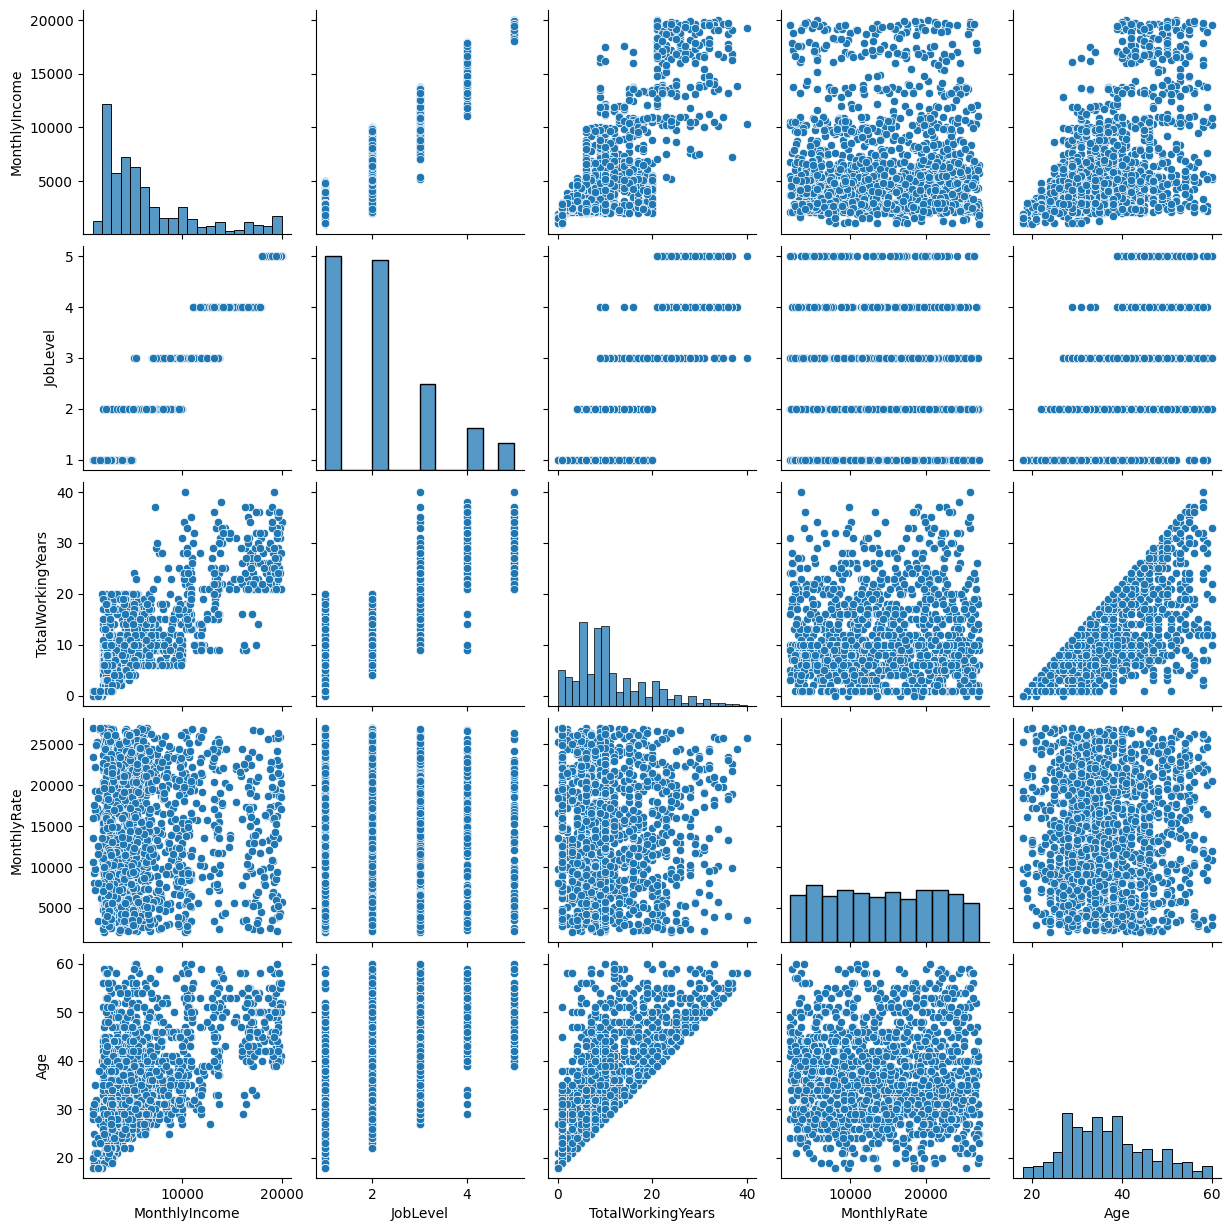

In [33]:
sns.pairplot(df[['MonthlyIncome','JobLevel','TotalWorkingYears','MonthlyRate','Age']]) #Age MontlyIncome

In [80]:
scale=alt.Scale(domain=df.JobRole.unique(),
                range=['#ff0f0f','#fef63c','#0bed01','#3157ff',
                       '#ab31ff','#fe4ff4','#31f7cd','#34495e'])
color=alt.Color('JobRole:O',scale=scale)

brush=alt.selection_interval(encodings=['x'])
click=alt.selection_point(encodings=['color'])

scatter=alt.Chart().mark_circle().encode(
    alt.X('MonthlyIncome',title='Monthly Income',scale=alt.Scale(domain=[0,20000])),
    alt.Y('Age',title='Age',
          scale=alt.Scale(domain=[18,60])),
          color=alt.condition(brush,color,alt.value('lightgray')),
          size=alt.Size('JobSatisfaction:O',scale=alt.Scale(domain=[1,2,3,4]))
    ).properties(height=350,width=550).add_params(brush).transform_filter(click)
bar=alt.Chart().mark_bar().encode(
    alt.X('count()'),
    alt.Y('JobRole:N'),
    color=alt.condition(click,color,alt.value('lightgray'))
    ).properties(height=300,width=500).add_params(click).transform_filter(brush)

charts=alt.vconcat(scatter,bar,data=df,title='Interactive Statistics')

In [81]:
charts

alt.VConcatChart(...)